# Exercises 2.

*Antti Härkönen*

## 1.

Discrete KL:

$$ KL(p(z) \mid \mid q(z)) = \sum_{z \in Z} p(z) log \frac{p(z)}{q(z)} $$

$$ KL(p(x, y) \mid \mid q(x, y)) = \sum_{y \in Y}\sum_{x \in X} p(x, y) log \frac{p(x, y)}{q(x, y)} $$

Using conditional probability:

$$ KL(p(x, y) \mid \mid q(x, y)) $$

$$ = \sum_{y \in Y}\sum_{x \in X} p(x, y) log \frac{p(x)p(y \mid x)}{q(x)q(y \mid x)} $$

$$ = \sum_{y \in Y}\sum_{x \in X} p(x, y) \biggl( log \frac{p(x)}{q(x)} + log \frac{p(y \mid x)}{q(y \mid x)} \biggr) $$

$$ = \sum_{y \in Y}\sum_{x \in X} p(x, y)  log \frac{p(x)}{q(x)} + \sum_{y \in Y}\sum_{x \in X} p(x, y) log \frac{p(y \mid x)}{q(y \mid x)} $$

$$ = \sum_{x \in X} p(x) log \frac{p(x)}{q(x)} + \sum_{y \in Y}\sum_{x \in X} p(x, y) log \frac{p(y \mid x)}{q(y \mid x)} $$

$$ = KL(p(x) \mid \mid q(x)) + KL(p(y \mid x) \mid\mid p(y \mid x)) $$

$$ \square $$

## 2.

$$ KL(p(x \mid \eta_1) \mid\mid p(x \mid \eta_2)) = \int p(x \mid \eta_1) log \frac{p(x \mid \eta_1)}{p(x \mid \eta_2)} dx = E_{\eta_1} \biggl(log \frac{p(\bf X \mid \eta_1)}{p(\bf X \mid \eta_2)}\biggr) $$

Using definition of exponential family $p(x \mid \eta) = h(x)exp(\eta^t T(x) - A(\eta)) $:

$$ KL(p(x \mid \eta_1) \mid\mid p(x \mid \eta_2)) $$

$$ = E_{\eta_1} \biggl(log \frac{h(\bf X)exp(\eta_1^t T(\bf X) - A(\eta_1))}{h(\bf X)exp(\eta_2^t T(\bf X) - A(\eta_2))}\biggr) $$

$$ = E_{\eta_1} (log exp(\eta_1^t T(\bf X) - A(\eta_1))-log exp(\eta_2^t T(\bf X) - A(\eta_2))) $$

$$ = E_{\eta_1} (\eta_1^t T(\bf X) - A(\eta_1) - \eta_2^t T(\bf X) + A(\eta_2)) $$

$$ = E_{\eta_1} (\eta_1^t T(\bf X)) - E_{\eta_1}(\eta_2^t T(\bf X)) - E_{\eta_1}(A(\eta_1)) + E_{\eta_1}(A(\eta_2)) $$

$$ = E_{\eta_1} (\eta_1 - \eta_2)^t E_{\eta_1} (T(\bf X)) - A(\eta_1) + A(\eta_2) $$

$$ = (\eta_1 - \eta_2)^t \mu_1 - A(\eta_1) + A(\eta_2) $$

$$ \square $$

## 3.

### Novel research problems

A big research area where mixed-membership models could be useful but have not been used are the analyses of social
classes in historical data. People have been classified using discrete classes (such as working class/middle class
or bourgeoisie/peasantry), but in reality most people have characteristics of multiple social groups depending on the
situation. People can also support radically different political agendas depending simultaneously on their personal views, so it would
make sense to represent individuals as mixtures of social and political profiles in Grade of Membership model. Data used might cover a variety of
demographic, economic and political sources.

This approach could be used to study many classical problems of historical sociology, such as:
* When did industrial working class emerge?
* Who were the supporters of various political movements, such as parties, religious movements or rebellions?

### Generative process:

For simplicity, assume all features are categorical.

1. For each social group k:
    1. for each feature j:
        1. draw profile proportion $\beta_{kj} \sim Dir(\eta)$
2. For each person i:
    1. draw proportion $\theta_i \sim Dir(\alpha)$
    2. for each feature j of a person i:
        1. draw "social mixture" $ z_{ij} \sim Dir(\theta_i) $
        2. draw value of feature $ x_{ij} \sim Dir(\beta_{kj}) $

### Plate diagram

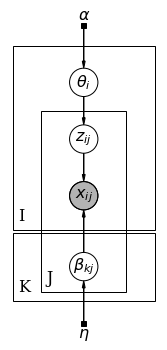

In [3]:
import daft
from matplotlib import rc

rc("font", family="serif", size=16)
scale = 1.25
pgm = daft.PGM()

pgm.add_node('alpha', r'$\alpha$', 1, 6, fixed=True, shape='rectangle')
pgm.add_node('theta', r'$\theta_i$', 1, 5)
pgm.add_node('z', r'$z_{ij}$', 1, 4)
pgm.add_node('x', r'$x_{ij}$', 1, 3, observed=True)
pgm.add_node('beta', r'$\beta_{kj}$', 1, 1.75)
pgm.add_node('eta', r'$\eta$', 1, 0.75, fixed=True, offset=(0, -20), shape='rectangle')

pgm.add_edge('alpha', 'theta', directed=True)
pgm.add_edge('theta', 'z', directed=True)
pgm.add_edge('z', 'x', directed=True)
pgm.add_edge('beta', 'x', directed=True)
pgm.add_edge('eta', 'beta', directed=True)

pgm.add_plate([0.25, 1.3, 1.5, 3.2], 'J')
pgm.add_plate([-0.25, 2.4, 2.5, 3.25], 'I')
pgm.add_plate([-0.25, 1.15, 2.5, 1.2], 'K')

pgm.render()

## 4.

